In [1]:

import numpy as np
from enterprise_extensions.model_utils import get_tspan
import pickle, json, os, corner, glob, random, copy, time, inspect
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines

plt.style.use('dark_background')
hist_settings = dict(
    bins = 40,
    histtype = 'step',
    lw = 3,
    density = True
)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
# %load_ext line_profiler

In [136]:
chain = np.loadtxt('../testnew/HM/chain_1.txt')
chain = chain[int(0.25 * chain.shape[0]):, :-4]
chain.shape

(154576, 139)

In [151]:
last_IR_idx = 67 * 2

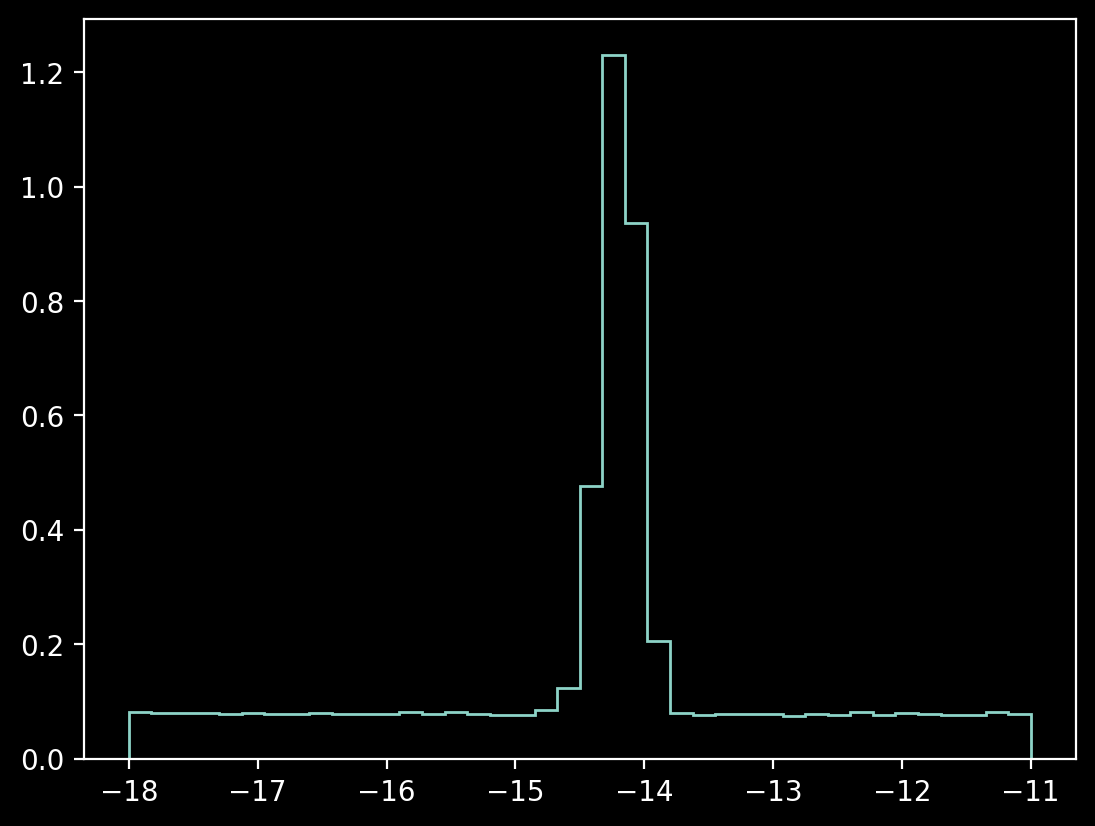

In [152]:
plt.hist(chain[:, last_IR_idx], **hist_settings)
plt.show()

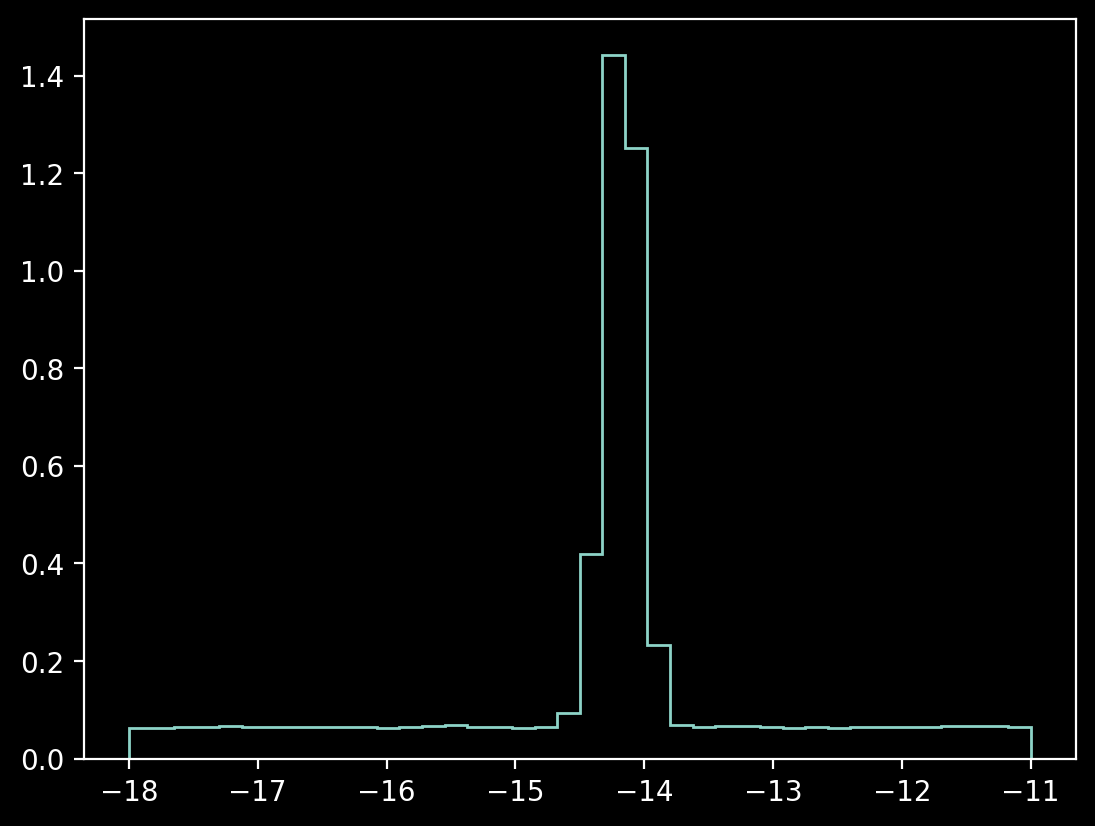

In [153]:
plt.hist(chain[:, last_IR_idx+2], **hist_settings)
plt.show()

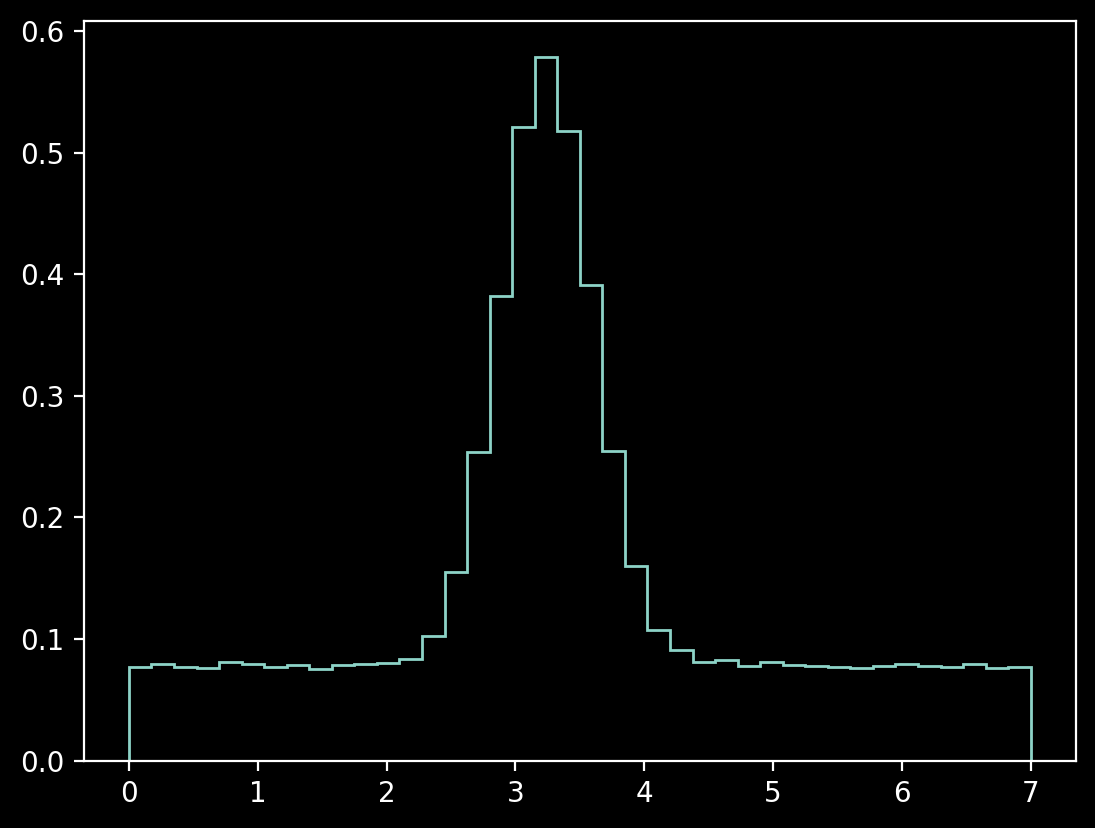

In [154]:
plt.hist(chain[:, last_IR_idx+1], **hist_settings)
plt.show()

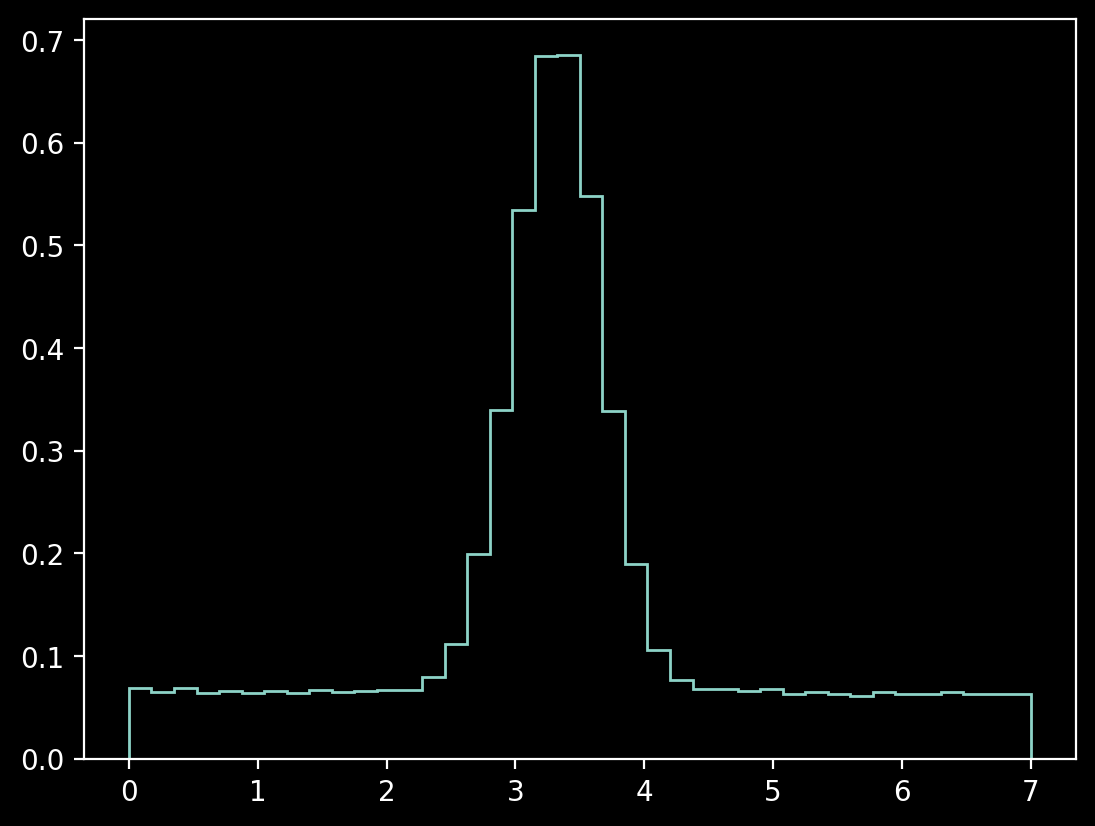

In [155]:
plt.hist(chain[:, last_IR_idx+3], **hist_settings)
plt.show()

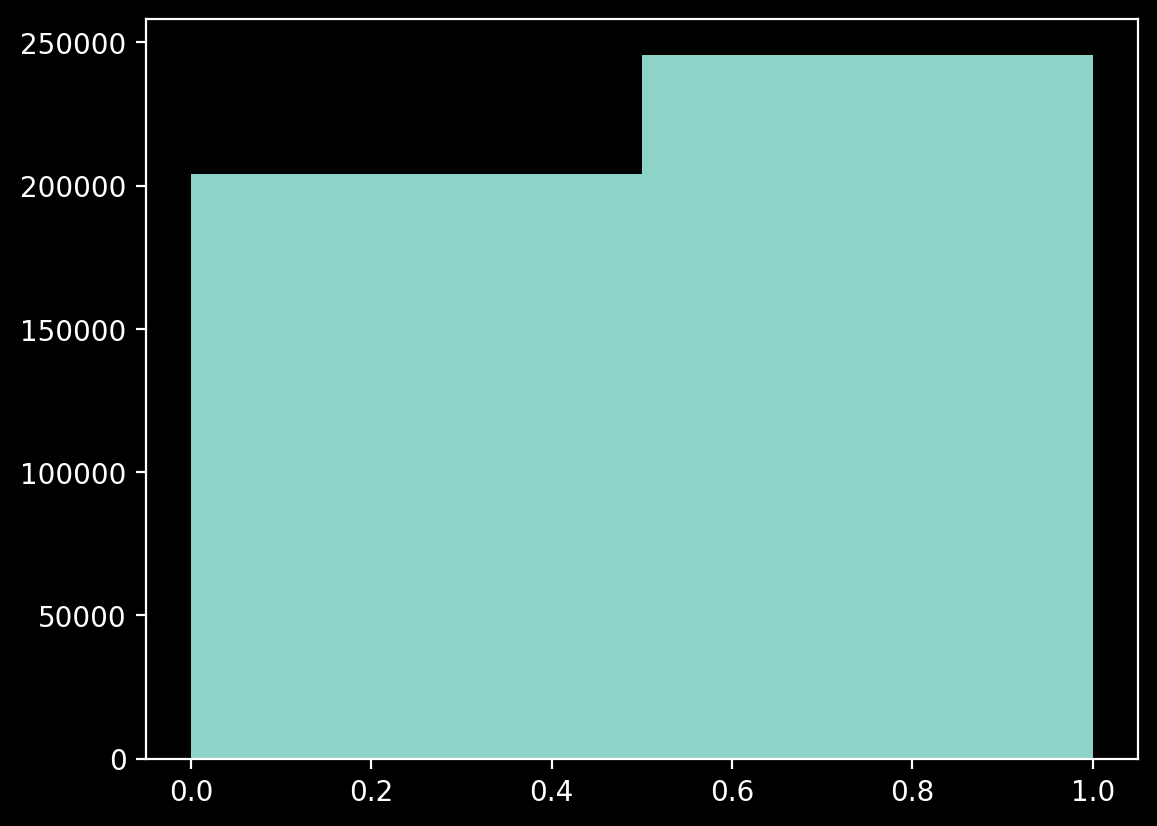

In [156]:
plt.hist(chain[:, -1], bins = 2, range = (0, 1))
plt.show()

In [143]:
rel_count, _ = np.histogram(chain[:, -1], bins = 2, range = (0, 1))
rel_count

array([65364, 89212])

In [144]:
rel_count[0]/rel_count[1] * 250

np.float64(183.17042550329552)

In [ ]:
chain = np.loadtxt('../testnew/HM/chain_1.txt')
chain = chain[:, :-4]
chain = chain[int(0.25 * chain.shape[0]):, :-4]
chain.shape

(600001, 139)

/tmp/ipykernel_143408/3103145397.py:7: RuntimeWarning: divide by zero encountered in log
  plt.scatter(idx, np.log(bf), color = 'gold')


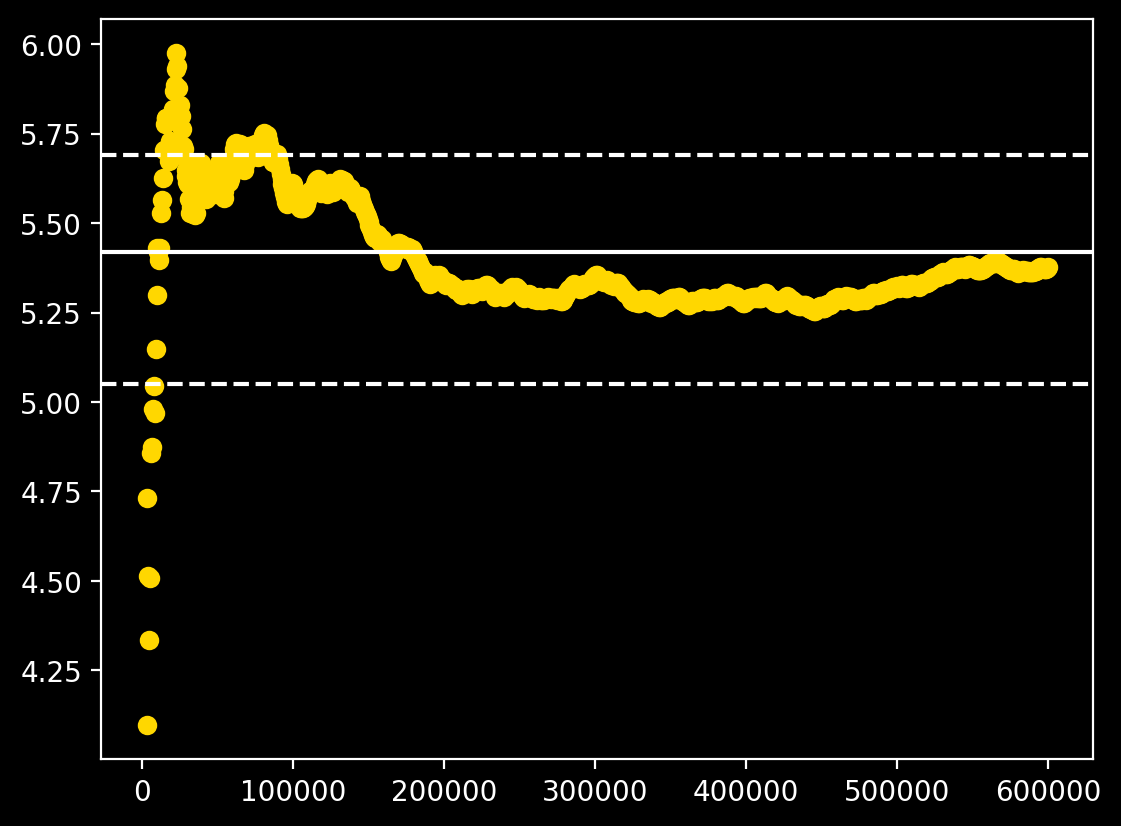

In [163]:
size = chain.shape[0]
n_time_stamps = 1001

for idx in np.linspace(0, size, n_time_stamps, dtype = int)[1:]:
    rel_count, _ = np.histogram(chain[0:idx, -1], bins = 2, range = (0, 1))
    bf = rel_count[0]/rel_count[1] * 250
    plt.scatter(idx, np.log(bf), color = 'gold')

plt.axhline(np.log(226))
plt.axhline(np.log(226 + 70), ls = '--')
plt.axhline(np.log(226 - 70), ls = '--')

plt.show()

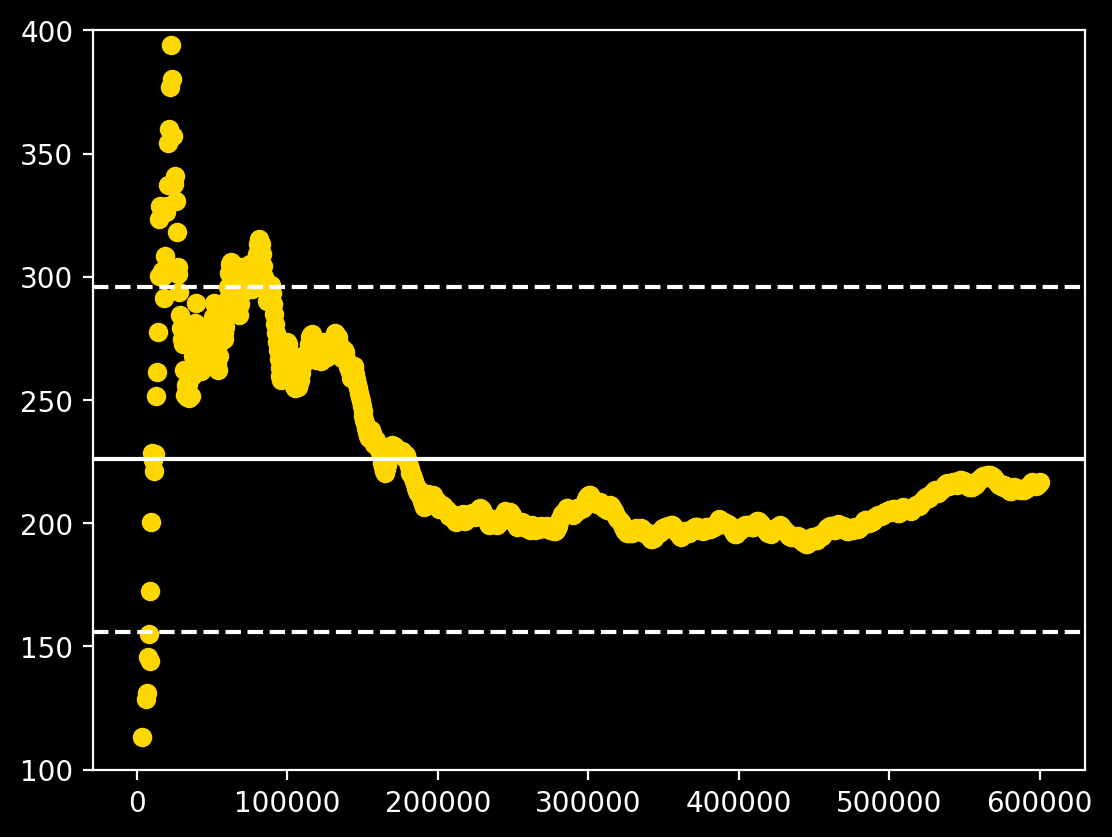

In [164]:
size = chain.shape[0]
n_time_stamps = 1001

for idx in np.linspace(0, size, n_time_stamps, dtype = int)[1:]:
    rel_count, _ = np.histogram(chain[0:idx, -1], bins = 2, range = (0, 1))
    bf = rel_count[0]/rel_count[1] * 250
    plt.scatter(idx, bf, color = 'gold')

plt.axhline(226)
plt.axhline(226 + 70, ls = '--')
plt.axhline(226 - 70, ls = '--')
plt.ylim(100, 400)
plt.show()